In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


---
# Problem
This project aims to address a supervised binary classification problem aimed at predicting customer churn(Identifying customers who are likely to discontinue their service in the next month)

# Why
The motivation for the project is customer retention. It is significantly more expensive for a company to acquire a new customer than it is to retain an existing one. By accurately predicting who will churn, the business can deploy targeted, proactive retention strategies to maximize customer lifetime value.


# Data
The data set used for this analysis is the Telco Customer churn dataset, sourced from KAGGLE. Link is provided in the README.md

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

(Target) Customers who left within the last month – the column is called Churn </br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</br>
Demographic info about customers – gender, age range, and if they have partners and dependents</br>


# Understanding the data
The final target variable is going to be: </br>
**Churn**(Categorical Binary) - Whether the customer churned or not

Customer Attributes:</br>
**gender**(Categorical Binary) - whether customer is male or female [male, female]</br>
**SeniorCitizen**(Binary) - Whether the customer is a senior citizen or not </br>
**Partner**(Categorical Binary) - Whether the customer has a partner or not [yes, no]</br>
**Dependents**(Categorical Binary) - Whether the customer has dependents or not [yes,no] </br>
**tenure**(Integer) - Number of months the customer has stayed with the company </br>
**PhoneService** (Categorical Binary) - Whether the customer has a phone service or not[yes, no] </br>
**MultipleLines**(Categorical) - Whether the customer has multiple lines or not[Yes, No, No phone service]</br>
**InternetService**(Categorical) - Customer's internet service provider(DSL, Fiber optic, No) </br>
**OnlineSecurity**(Categorical)- Whether the customer has online security or not [Yes, No, No internet service] </br>
**OnlineBackup**(Categorical) - Whether the customer has online backup or not[Yes, No, No internet service] </br>
**DeviceProtection**(Categorical) - Whether the customer has device protection or not [Yes, No, No internet service]</br>
**TechSupport**(Categorical) - Whether the customer has tech support or not [Yes, No, No internet service] </br>
**StreamingTV**(Categorical) - Whether the customer has streaming TV or not[Yes, No, No internet service] </br>
**StreamingMovies**(Categorical) - Whether the customer has streaming moves or not[Yes, No, No internet service] </br>
**Contract**(Categorical) - The contract term of the customer [Month-to-month, One year, Two year] </br>
**PaperlessBilling**(Categorical Binary) - Whether the customer has paperless billing or not  </br>
**PaymentMethod**(Categorical) - The customer's payment method [Electronic check, Mailed check, Bank transfer (automatic), Credit card]  </br>
**MonthlyCharges**(Float) - The amount charged to the customer monthly </br>
**TotalCharges** (Float) - The total amount charged to the customer </br>




Reading in our data we want to store it as a DataFrame. We can then show the shape that will print in (Number of observations, Number of categories). The number of categories will include our target category. So 20 customer attributes and 1 target attribute. We can also print out the first 5 observations so we can get a feel for how the data looks.

In [27]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# customerID is a series of non-helpful anonymous id structure that will make things
# more confusing if I decided to use it as my index inplace of integer values. So I will drop it
df.drop("customerID", axis=1, inplace=True)
print(f"Number of customer records {df.shape[0]}, Number of columns / attributes {df.shape[1]}")
df.head(5)


Number of customer records 7043, Number of columns / attributes 20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---
# Data Type Conversion & Memory Optimization
The goal of this section is to not only get all our variables into the correct python data type but also decrease our memory footprint

In [28]:
print("Current Data Types and Memory Usage: ")
df.info()

Current Data Types and Memory Usage: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  Paym

**Note:** A couple things that stand out is that most of our categorical variables came as the dtype object which is expected. We will be able to to manipulate these in the following steps  into the dtype category in order to give meaning to the string, save space with the optimization of dtype category, and it gives us a lot more category based functions such as the codes which will allow us to streamline the process into OneHotEncoding which we will use in modeling.

Another things that seems out of place or interesting to point out is that our TotalCharges came in as an object meaning a string. We expected this to come in as float. This means there must be some irregular data that ended up generating the entire column as string. We will handle this before going into our categories so it does not get mixed up with our category objects.

In [29]:
# Total charges came in as an object to make sure it does not get into our
# category_list we will turn it to numerical while making sure any invalid numbers turn to NA(errors = 'coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Senior Citizen came in as Binary meaning numeric, to make sure we don't miss it
# we can just add to category list
object_cols = df.select_dtypes(include=['object']).columns.tolist()
category_list = object_cols + ['SeniorCitizen']
# Turns our category columns into the Dtype category
for col in category_list:
    df[col] = pd.Categorical(df[col])




In [30]:
print(f"Information Page on our data after Transforming this into Categorical Columns: ")
df.info()

Information Page on our data after Transforming this into Categorical Columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   catego

**Note:** From our info page we can validate that our want to be categorical columns are changed to the dtype category. Another thing to note is the change in Memory Usage. This was a significant drop form the start of our data. This validates the optimization that comes with using the category dtype.

Our next step will involve saving some more space in how our integer and floats are representing our data. Currently all our numerical data type are being represented with 64 bits. This might not be necessary and we can save more space by down casting those numbers into appropriate bit number representation. 

In [31]:
# These will downcast our float and integer columns separately
integer_col = df.select_dtypes(include=['int64']).columns.tolist()
float_col = df.select_dtypes(include=['float64']).columns.tolist()

# Using very helpful downcast parameter that will take our numerical value and downcast it to the number of bits that can still represent our data
for col in integer_col:
    df[col] = pd.to_numeric(df[col], downcast='integer')

for col in float_col:
    df[col] = pd.to_numeric(df[col], downcast='float')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int8    
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

**Note:** This is a much better and more informative data frame. The objects became more descriptive categorical variables,that also hold the inner codes representing the data , and our numeric columns are stored at the minimum bits that is still able to represent our data. e.g. Memory saving going from  int64 -> int8

Next, as we mentioned our TotalCharges columns came in with an unexpected dtype. We replaced invalid data with with NA we will now count the invalid data.

In [33]:
print("Count of Missing Values per Column: ")
df.isna().sum()

Count of Missing Values per Column: 


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Note:** From what we can see above the table representing the number of NULL observations in each column.There were a couple of items within TotalCharges that came out to be NULL. While there are many way to approach missing data since there is a small amount of missing data compared to our total observations, the approach I will take it to drop that those observation.

In [34]:
df = df.dropna()
print(f"New Shape, {df.shape[0]} Observations/Customers, Still the same {df.shape[1]} columns")

New Shape, 7032 Observations/Customers, Still the same 20 columns


In [35]:
print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798210,2283.300537
std,24.545260,30.085947,2266.770508
min,1.000000,18.250000,18.799999
25%,9.000000,35.587499,401.449997
50%,29.000000,70.349998,1397.475037
75%,55.000000,89.862499,3794.737488
max,72.000000,118.750000,8684.799805


**Summary Statistics Observations:**

Tenure and TotalCharges show significant Right Skewness: The Mean TotalCharges (2,283) is much higher than the Median (1,397). This strong skewness is expected, as a large number of customers have only recently joined (low tenure, low total charges).

MonthlyCharges are Wide-Ranging: The monthly fee ranges from 18.25 to 118.75. The median is slightly higher than the mean hinting at some skewness.

Visual Confirmation is Needed: While these statistics suggest skewness, we will use Density Plots (Histograms) and Box Plots in the following steps to visually confirm these distribution shapes and check for outliers.

In [36]:
print("Descriptive Analysis of Categorical Columns:")
df.describe(include = ["category"])

Descriptive Analysis of Categorical Columns:


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


**Summary Categorical Statistics Observation:**</br>

Through our frequency table we make a example of the most frequent customer. This is going to be a younger male with not dependents with one line of phone service. He has Internet Service of type fiber optic with no other add-ons. They are on a month-to-month contract paying through Electronic check and will not churn.

---
# Visualization

The next step in my EDA process is being able to visualize the data so we can see some trends and information about the data before we go into modeling.

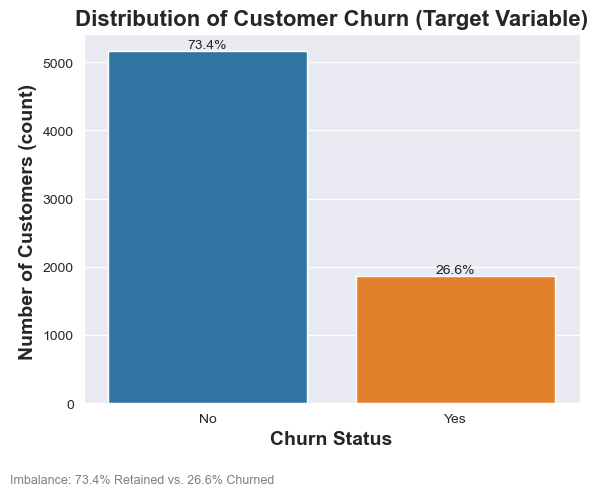

In [37]:
total = len(df)
churn_counts  = df["Churn"].value_counts()
churn_percentages = churn_counts / total * 100

ax = sns.countplot(x="Churn",
                   data=df,
                   order=["No", "Yes"],
                   hue = "Churn",
                   legend = False)

for p in ax.patches:
    percentage = "{:.1f}%".format(p.get_height()/ total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha="center", va="bottom")

plt.title("Distribution of Customer Churn (Target Variable)", fontsize=16, fontweight="bold")
plt.xlabel("Churn Status", fontsize=14, fontweight="bold")
plt.ylabel("Number of Customers (count) ", fontsize=14, fontweight="bold")


plt.figtext(0.01, -0.05, f"Imbalance: {churn_percentages['No']:.1f}% Retained vs. {churn_percentages['Yes']:.1f}% Churned ", fontsize=9, wrap =  True, color = "gray", horizontalalignment = "left", verticalalignment = "center")
plt.show()

**Note:** There is a large imbalance in our target variable. This can be a problem because our model could just learn that saying No would get it a high percentage on accuracy since it would have more data on that. We do not want that since it's not going to learn patterns when it comes with new data and would lead to lower accuracy on new data. This we will deal with in our modeling phase.

In [38]:
# Since our Target Variable,churn, we made a separate countplot we will remove it from this next visualization
category_list.remove("Churn")

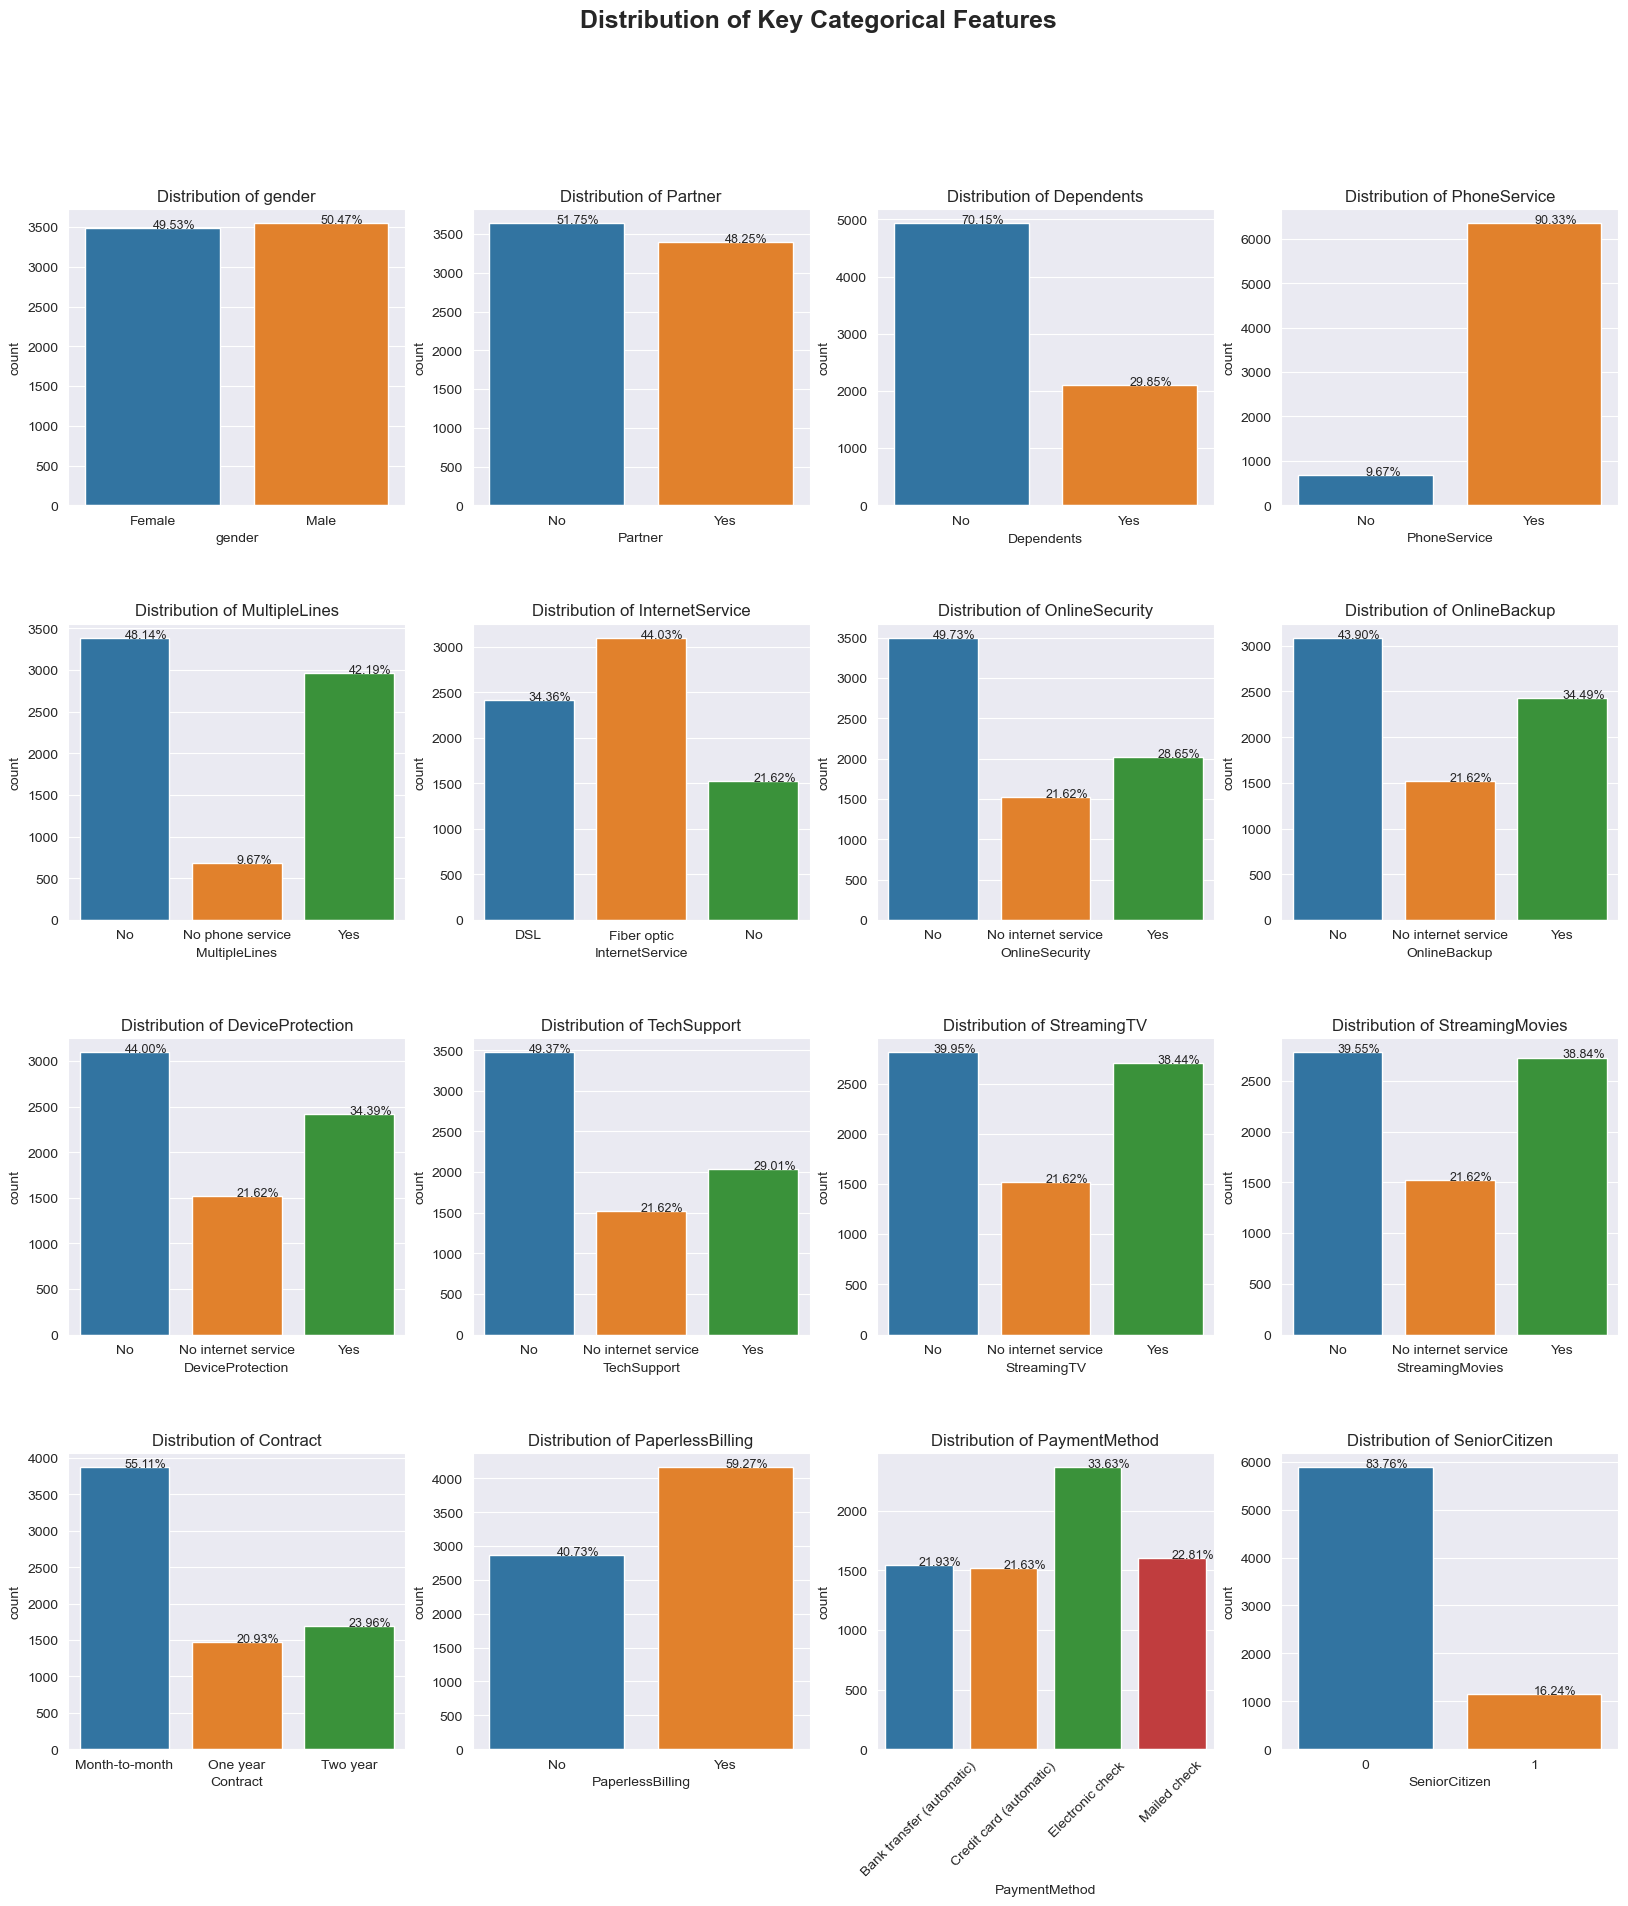

In [39]:
fig,axes = plt.subplots(nrows = 4, ncols= 4, figsize = (20,20))
plt.subplots_adjust(hspace = 0.4)

total_rows = df.shape[0]
for col, ax in zip(category_list, axes.ravel()):
    sns.countplot(data = df, x = col, ax = ax, hue = col, legend = False)

    for p in ax.patches:
        percentage = (p.get_height()/total_rows) * 100
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f"{percentage:.2f}%", (x,y),  fontsize = 9)

    ax.set_title(f"Distribution of {col}")

    # Fixing Weird Labeling for the Payment Method Graph
    if col in ['PaymentMethod']:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)

plt.suptitle("Distribution of Key Categorical Features", fontsize=18, fontweight="bold")
plt.show()

**Note:** This figure of **Count plot** of our categorical EDA reveals that our data set is mostly balanced in items such as **gender** and **partner** showing a good distribution of our sample. There are a variety of categories with larger imbalances such as **Contract** where a majority of the customers use Month-to-month contract type, and **Phone Service**(90%) of customers do have phone service. Our **internet services** matches across other services that depend on it. Such as **Online Security** and **Tech Support** since you cannot have these without Internet. We also have an imbalance with most of the customers not being **senior citizens**.

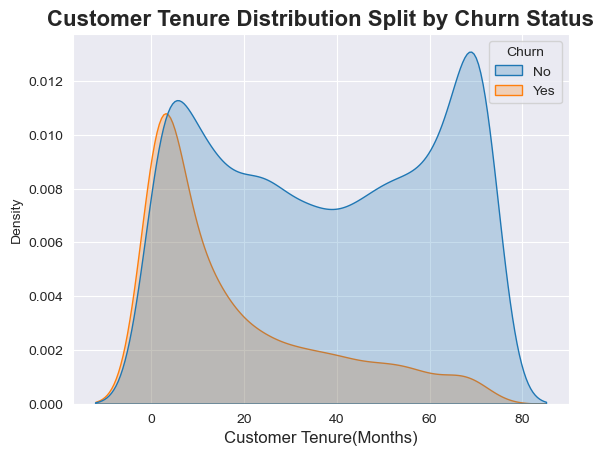

In [40]:
sns.kdeplot(data = df, x = "tenure", hue = "Churn", fill= True )
plt.title("Customer Tenure Distribution Split by Churn Status", fontsize=16, fontweight="bold")
plt.xlabel("Customer Tenure(Months)" , fontsize=12)
plt.show()

**Note:** **This Kernel Density Estimate(KDE) plot** reveals a strong inverse relationship and the immense right-skewness there is when it comes to the **customer tenure** and **churn probability**. We clearly also can take note of the high Churn Rate during the first couple 0 to 8 Months. We also see that density to Churn drops off dramatically after approximately 18 months. This is an action a company could use as the critical window to retain customers. We also see the stabilization that comes after this that having long term and loyal customers leads to a significantly lower churn rate.

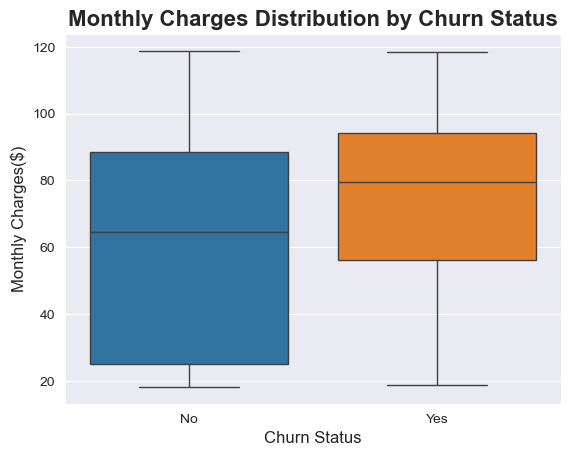

In [41]:
sns.boxplot(data = df, x = "Churn", y = "MonthlyCharges", hue = "Churn")

plt.title("Monthly Charges Distribution by Churn Status", fontsize=16, fontweight="bold")
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Monthly Charges($)", fontsize=12)

plt.show()

**Note:** The **Box Plot** on monthly charge separated by churn. This validates our ideas that those with higher monthly charge are more likely to churn.

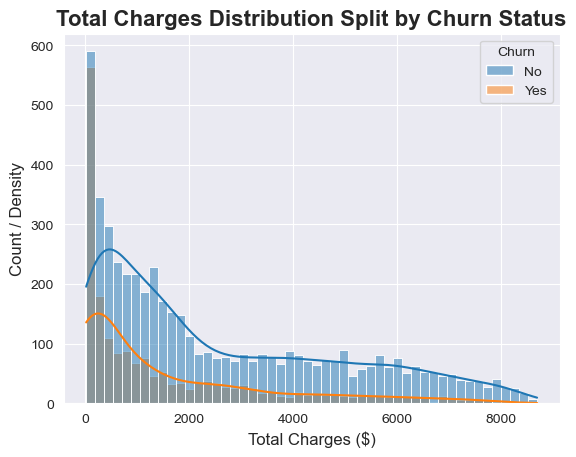

In [42]:
sns.histplot(df, x= "TotalCharges", hue = "Churn", kde = True, fill = True, bins = 50)
plt.title('Total Charges Distribution Split by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Total Charges ($)', fontsize=12)
plt.ylabel('Count / Density', fontsize=12)
plt.show()

**Note:** From the **Hist Plot** with the overlaying **KDE Plot** on the Total Charges of our data split by churn we validate the high right-skewness of our data. Meaning a high amount of outliers and our mean being much higher than our median. This means really most of our customers are tied up near the median. This is a combination of clients who churn and do not accumulate a lot of total charge and those that pay for lower serviced and not churn compared to those who stay longer and pay much more.


<Axes: >

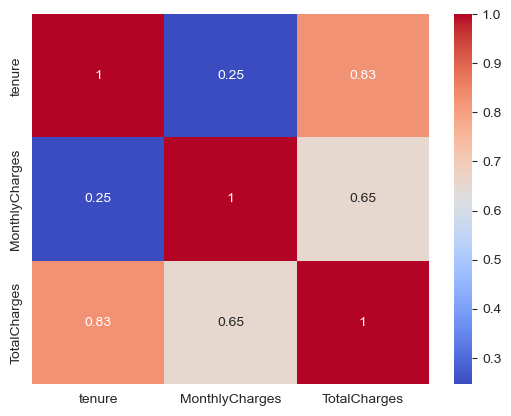

In [43]:
sns.heatmap(df[["tenure", "MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap = "coolwarm")

**Note:** Trough this **Heatmap plot** of the correlation between our Numerical Data we can see how our data correlate with each other. We can see that all are positive relationships. This makes sense since in our scenario you cant get negative time or negative total charge. One thing that I had to think about for a bit is the fact that Tenure and Total Charge are more correlated than monthly charge and Total Charge. This makes sense because as we have seen in prior graphs a higher monthly rate also means a higher chance of churn. This also plays into how our monthly charge and tenure are the least correlated but still positive. Higher monthly charges means they are likely to not stay long.

In [44]:
service_cols = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df_melted = df.melt(
    id_vars=["Churn"],
    value_vars=service_cols,
    var_name="Service",
    value_name="SubscriptionStatus"
)


In [45]:
print(f"df_melted shape {df_melted.shape}: Noting the many more rows")
print("We can also how the raw data of df_melted looks: ")
df_melted.head(10)

df_melted shape (42192, 3): Noting the many more rows
We can also how the raw data of df_melted looks: 


,Churn,Service,SubscriptionStatus
0,No,OnlineSecurity,No
1,No,OnlineSecurity,Yes
2,Yes,OnlineSecurity,Yes
3,No,OnlineSecurity,Yes
4,Yes,OnlineSecurity,No
5,Yes,OnlineSecurity,No
6,No,OnlineSecurity,No
7,No,OnlineSecurity,Yes
8,Yes,OnlineSecurity,No
9,No,OnlineSecurity,Yes


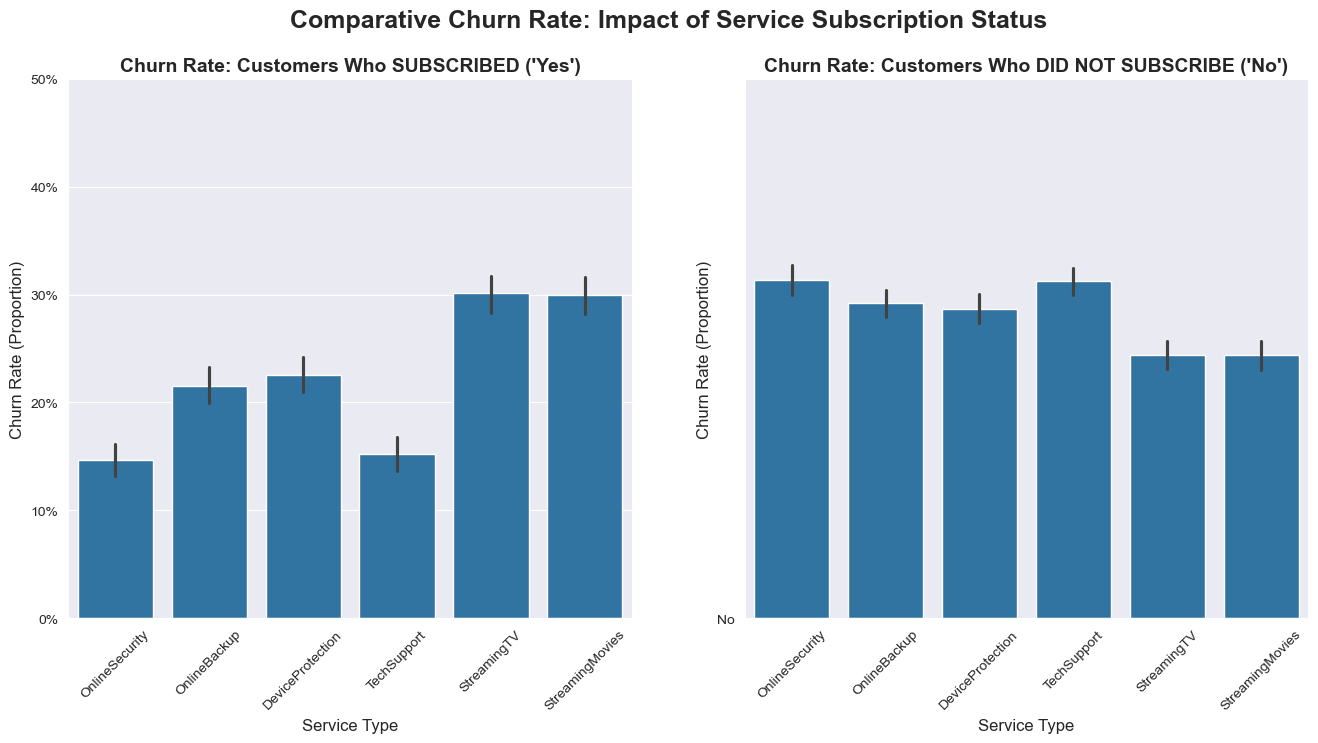

In [46]:

df_yes = df_melted[df_melted['SubscriptionStatus'] == 'Yes'].copy()
df_no = df_melted[(df_melted['SubscriptionStatus'] == 'No')  | (df_melted["SubscriptionStatus"] == "No internet service")].copy()

ticks = np.arange(0, 0.51, 0.10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
#LEFT PLOT: CHURN RATE FOR ACTIVE SUBSCRIBERS ('Yes')
sns.barplot(
    data=df_yes,
    x='Service',
    y='Churn',
    ax=axes[0],
)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([f"{int(t*100)}%" for t in ticks])
axes[0].set_title("Churn Rate: Customers Who SUBSCRIBED ('Yes')", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Service Type", fontsize=12)
axes[0].set_ylabel("Churn Rate (Proportion)", fontsize=12)
axes[0].set_ylim(0, 0.5)

#RIGHT PLOT: CHURN RATE FOR NON-SUBSCRIBERS ('No')
sns.barplot(
    data=df_no,
    x='Service',
    y='Churn',
    ax=axes[1],
)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([f"{int(t*100)}%" for t in ticks])
axes[1].set_title("Churn Rate: Customers Who DID NOT SUBSCRIBE ('No')", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Service Type", fontsize=12)
axes[1].set_ylabel("Churn Rate (Proportion)", fontsize=12)
axes[1].set_ylim(0, 0.5)

plt.suptitle("Comparative Churn Rate: Impact of Service Subscription Status", fontsize=18, fontweight="bold")
plt.show()

**Note:** The **Bar Plots** above shows that those who do subscribe to auxiliary internet services(Online Security, OnlineBackup, DeviceProtection, TechSupport) are less likely to churn compared to those who do not subscribe. However, this is not true for StreamingTV and StreamingMovies where those who do end up subscribing end are more likely to churn. This makes sense as people who purchase auxiliary internet services will depend more on a company and end up staying. Now for Streaming this also makes sense since these are usually more expensive packages. We have seen before that higher monthly charge will make people more likely to churn.

**Final Node:** This problem will end up being a classification mining problem. This is because we will be assigning items to a target category by building a predictive model on our data. This model can then be used on new data generate an accurate prediction on the data. My first step will be to compare the results of fold cross-validation between different types of machine learning classifiers. These would be decision tree, Logistic Regression, and Neural Nets. Comparing these will allow me to choose the most appropriate classifier based on my problem.

I will then use GridSearch in order to meticulously tune the Hyperparameters and get the best result and analyze why these parameters came out with the best results.

**Primary Objective:** The main Goal of this project is to clearly present a pipeline of the Applied Machine Learning process that I can reference back to. This pipeline would also be a story to reference in a job application or interview.


**Hypothesis:** My hypothesis for this data is that Tenure is going to be very important factor in our classification model. Specifically that roughly 18 month checkpoint that I feel is going to critical and informative. I also think the best classifier will be between Decision Tree and Neural Nets due their ability to separate non-linear boundaries.

**Challenges:** The main challenge I think I will face is the target(churn) imbalance. This could really make our model worthless.

**TimeLine:** I plan to have the EDA complete by fridays deadline. I will be able to work on this during the break which will give me time go through the classifiers and hopefully finish the parameter tuning by the end of Thanksgiving break. This will leave me the testing period to finish the final proposal and clean it up.